In [39]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst

In [40]:
npb_p = pd.read_csv('./npb_투수.csv', encoding = 'cp949')
npb_b = pd.read_csv('./npb_타자.csv', encoding = 'cp949')


In [41]:
npb_p['구단'] = npb_p['구단'].str[2:]
npb_b['구단'] = npb_b['구단'].str[2:]

In [42]:
x = [8,11,12,13,26]
y = [7,14,17,22,23,39]
for i in npb_p.columns[x]:
    npb_p[i] = npb_p[i].str.replace(',','').astype(int)

for i in npb_b.columns[y]:
    npb_b[i] = npb_b[i].str.replace(',','').astype(int)

In [43]:
npb_p['QS비율'] = npb_p['QS비율'].str[:-2]
npb_p['QS비율'] = npb_p['QS비율'].astype(float)

In [44]:
npb_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      96 non-null     int64  
 1   구단      96 non-null     object 
 2   경기수     96 non-null     int64  
 3   승수      96 non-null     int64  
 4   타율      96 non-null     float64
 5   타점      96 non-null     int64  
 6   홈런      96 non-null     int64  
 7   안타수     96 non-null     int32  
 8   단타      96 non-null     int64  
 9   2루타     96 non-null     int64  
 10  3루타     96 non-null     int64  
 11  출루율     96 non-null     float64
 12  장타율     96 non-null     float64
 13  OPS     96 non-null     float64
 14  득점권 타수  96 non-null     int32  
 15  득점권 안타  96 non-null     int64  
 16  득점권     96 non-null     float64
 17  UC타수    96 non-null     int32  
 18  UC안타    96 non-null     int64  
 19  UC비율    96 non-null     float64
 20  UC홈런    96 non-null     int64  
 21  경기수.1   96 non-null     int64  
 22  타석수 

In [46]:
print(npb_b.columns)
print(npb_p.columns)

Index(['연도', '구단', '경기수', '승수', '타율', '타점', '홈런', '안타수', '단타', '2루타', '3루타',
       '출루율', '장타율', 'OPS', '득점권 타수', '득점권 안타', '득점권', 'UC타수', 'UC안타', 'UC비율',
       'UC홈런', '경기수.1', '타석수', '타수', '득점', '볼넷', '사구', '도루시도', '도루성공',
       '도루 성공률', '희생번트시도', '희생번트성공', '희타 성공률', '희비', '대타수', '대타 안타', '대타율',
       '병살', '실책', '피삼진'],
      dtype='object')
Index(['연도', '구단', '경기수', '승수', '방어율', '선발 방어율', '구원 방어율', '세이브', '탈삼진수',
       '투구이닝', '9이닝당 탈삼진수', '투구수', '타자수', '피안타수', '피홈런', '사구', '사사구', '고의사구',
       '실점', '자책점', '완투', '완봉', '무사사구', '피안타율', 'QS비율', 'WHIP', 'UC타수',
       'UC피안타', 'UC타율', 'UC피홈런', '홀드'],
      dtype='object')


In [58]:
npb_p2 = npb_p.drop(['경기수', '승수'], axis = 1)
npb_b2 = npb_b.drop(['경기수.1'], axis = 1)
npb_p2.rename(columns = {'사구' : '사구 허용', 'UC타수' : 'UC타수허용', 'UC타율' : 'UC피안타율'}, inplace = True)
npb_b2.rename(columns = {'UC비율' : 'UC타율'}, inplace = True)

In [60]:
npb = pd.merge(npb_b2, npb_p2, how = 'inner', on = ['연도', '구단'])


In [62]:
npb['승률'] = npb['승수'] / npb['경기수'] 

In [63]:
npb_corr.corr()

,승수,타율,타점,홈런,안타수,단타,2루타,3루타,출루율,장타율,...,무사사구,피안타율,QS비율,WHIP,UC타수허용,UC피안타,UC피안타율,UC피홈런,홀드,승률
승수,1.000000,0.529003,0.673206,0.492418,0.617921,0.420433,0.399963,0.294944,0.472845,0.537970,...,0.044564,0.028028,0.101151,-0.035248,0.315261,0.309495,0.031237,0.118165,0.093603,0.934069
타율,0.529003,1.000000,0.714299,0.394163,0.669987,0.531360,0.417241,0.204634,0.749174,0.698883,...,-0.063067,0.116931,0.011542,0.157556,-0.017643,0.041837,0.104184,0.054108,-0.074930,0.552015
타점,0.673206,0.714299,1.000000,0.764167,0.702891,0.368043,0.555376,0.240351,0.757888,0.834686,...,-0.059255,0.125685,-0.080488,0.135485,0.139114,0.190856,0.111778,0.232262,0.099138,0.606222
홈런,0.492418,0.394163,0.764167,1.000000,0.386836,-0.045864,0.346535,-0.029520,0.412439,0.893208,...,-0.050813,0.078304,-0.159317,0.094090,0.019832,0.054295,0.065601,0.192890,0.121215,0.474585
안타수,0.617921,0.669987,0.702891,0.386836,1.000000,0.877755,0.642268,0.265087,0.388057,0.422184,...,0.022938,0.086209,0.149160,0.008442,0.534568,0.543690,0.086251,0.269419,0.146241,0.375089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UC피안타,0.309495,0.041837,0.190856,0.054295,0.543690,0.549197,0.339009,0.127263,-0.081371,-0.075641,...,0.157096,0.369525,0.249416,0.133110,0.845680,1.000000,0.406920,0.304858,0.113135,0.065642
UC피안타율,0.031237,0.104184,0.111778,0.065601,0.086251,0.062285,0.051912,0.029168,0.115106,0.085948,...,0.094625,0.861043,-0.226535,0.723518,-0.140651,0.406920,1.000000,0.349621,-0.276461,0.029592
UC피홈런,0.118165,0.054108,0.232262,0.192890,0.269419,0.187106,0.202068,0.097178,0.042354,0.115778,...,0.117437,0.380488,-0.315353,0.281243,0.118229,0.304858,0.349621,1.000000,0.084615,0.011681
홀드,0.093603,-0.074930,0.099138,0.121215,0.146241,0.093589,0.116413,0.039111,-0.084915,0.016860,...,-0.252980,-0.260679,-0.382134,-0.282991,0.282802,0.113135,-0.276461,0.084615,1.000000,0.004238


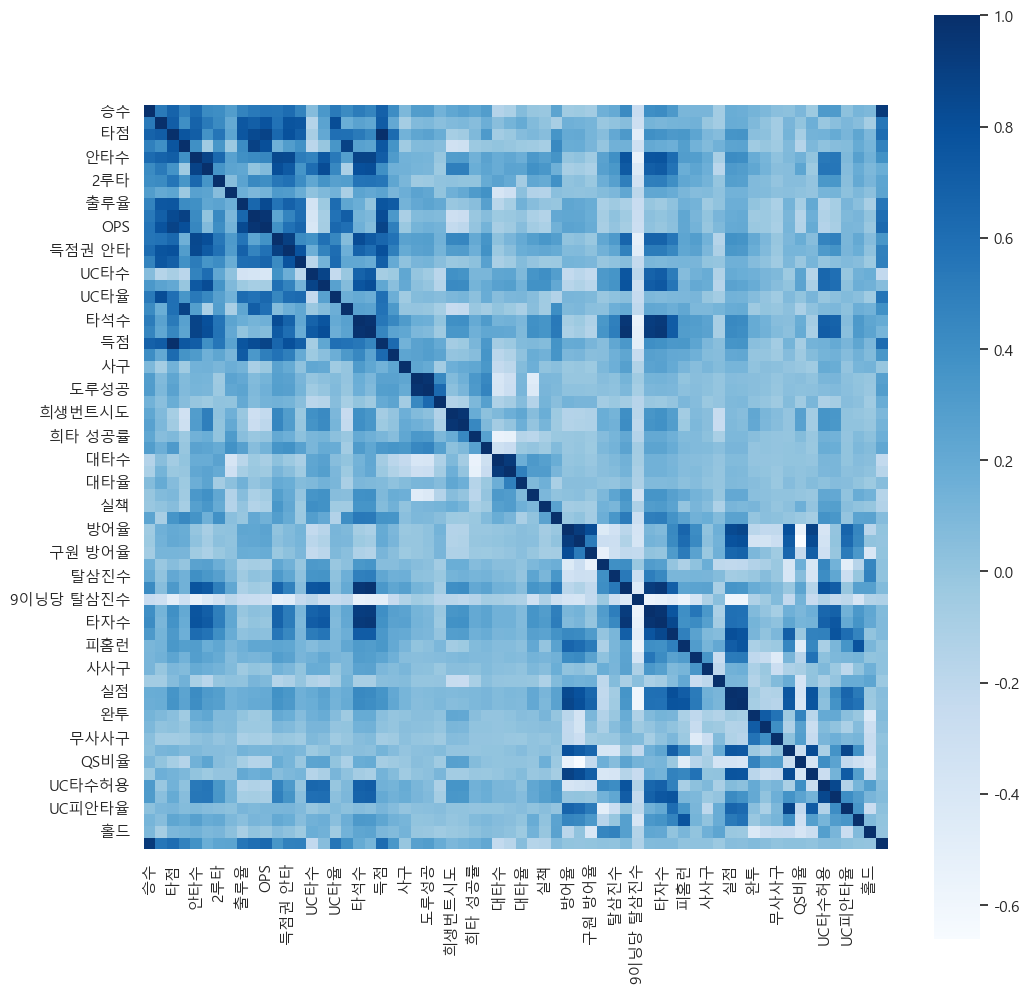

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
#상관관계 시각화
plt.figure(figsize = (12,12))
sns.heatmap(npb_corr.corr(),
            annot = False,
            cmap = 'Blues',
            square = True,
            fmt = '.2f',
            annot_kws = {'size':8})
plt.show()#몇가지 피쳐 이름 생략됨

In [15]:
npb.columns

Index(['연도', '구단', '경기수', '승수', '타율', '타점', '홈런', '안타수', '단타', '2루타', '3루타',
       '출루율', '장타율', 'OPS', '득점권 타수', '득점권 안타', '득점권', 'UC타수', 'UC안타', 'UC타율',
       'UC홈런', '타석수', '타수', '득점', '볼넷', '사구', '도루시도', '도루성공', '도루 성공률',
       '희생번트시도', '희생번트성공', '희타 성공률', '희비', '대타수', '대타 안타', '대타율', '병살', '실책',
       '피삼진', '방어율', '선발 방어율', '구원 방어율', '세이브', '탈삼진수', '투구이닝', '9이닝당 탈삼진수',
       '투구수', '타자수', '피안타수', '피홈런', '사구 허용', '사사구', '고의사구', '실점', '자책점', '완투',
       '완봉', '무사사구', '피안타율', 'QS비율', 'WHIP', 'UC타수허용', 'UC피안타', 'UC피안타율',
       'UC피홈런', '홀드', '승률'],
      dtype='object')

In [64]:
npb_uc = npb[['UC타율', 'UC홈런', 'UC피안타율', 'UC피홈런', '승률']]

In [65]:
npb_uc

,UC타율,UC홈런,UC피안타율,UC피홈런,승률
0,0.244,47,0.241,47,0.531469
1,0.262,49,0.225,58,0.531469
2,0.221,60,0.234,40,0.503497
3,0.235,47,0.241,52,0.482517
4,0.231,51,0.244,53,0.482517
...,...,...,...,...,...
91,0.242,49,0.247,39,0.552448
92,0.266,38,0.270,46,0.510490
93,0.249,47,0.245,43,0.482517
94,0.251,38,0.252,41,0.426573


In [68]:
pd.options.mode.chained_assignment = None

def scaling(df, scale_columns):
    for i in scale_columns:
        series_mean = df[i].mean()
        series_std = df[i].std()
        df[i] = df[i].apply(lambda x : (x - series_mean)/series_std)
    return df

In [70]:
column = npb_uc.columns.difference(['승률'])
scaling(npb_uc, column)

,UC타율,UC홈런,UC피안타율,UC피홈런,승률
0,-0.476024,-0.363750,-0.544320,-0.575610,0.531469
1,1.019557,-0.203933,-1.674150,0.609271,0.531469
2,-2.387044,0.675061,-1.038620,-1.329625,0.503497
3,-1.223815,-0.363750,-0.544320,-0.037028,0.482517
4,-1.556166,-0.044116,-0.332476,0.070689,0.482517
...,...,...,...,...,...
91,-0.642200,-0.203933,-0.120633,-1.437341,0.552448
92,1.351908,-1.082928,1.503499,-0.683326,0.510490
93,-0.060585,-0.363750,-0.261862,-1.006476,0.482517
94,0.105591,-1.082928,0.232439,-1.221908,0.426573


In [66]:
from supervised.automl import AutoML

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [71]:
x_train, x_val, y_train, y_val = train_test_split(
    npb_uc[npb_uc.columns.difference(['승률'])],
    npb_uc['승률'],
    test_size=0.2,
    random_state=123,
)

In [72]:
automl = AutoML(mode="Explain")
automl.fit(x_train, y_train)

AutoML directory: AutoML_1
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline rmse 0.05267 trained in 0.15 seconds
2_DecisionTree rmse 0.041044 trained in 5.94 seconds


c:\Users\User\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'


3_Linear rmse 0.040674 trained in 4.48 seconds
* Step default_algorithms will try to check up to 3 models


c:\Users\User\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'


4_Default_Xgboost rmse 0.043598 trained in 4.93 seconds


c:\Users\User\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'


5_Default_NeuralNetwork rmse 0.049403 trained in 4.28 seconds


c:\Users\User\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'


6_Default_RandomForest rmse 0.042983 trained in 1.08 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 0.034836 trained in 0.15 seconds
AutoML fit time: 24.7 seconds
AutoML best model: Ensemble


AutoML()

In [73]:
y_pred = automl.predict(x_val)
print(mean_absolute_error(y_val, y_pred))
print(r2_score(y_val, y_pred))

0.03675579564403933
0.637462516671033


## NPB에서는 KBO에서 사용하지 않는 지표인 'UC'라는 지표가 있다.

### VDUCP(UC) 산출 방법
### 1. 타석에 서는 시점에서의 득점차를 산출하고,
### 2. 홈런이 나오면 동점, 이기고, 역전이 되는 장면이라면 VDUCP(UC) 타수로서 카운트
